In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix


In [2]:
df = pd.read_csv("Data_Iris.csv")
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species,species_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [3]:
y = df['species_name'].values
X=df.drop(columns='species_name').values
print("X shape", X.shape)
print("y shape", y.shape)

X shape (150, 5)
y shape (150,)


In [4]:
labels=np.unique(y) #all four features are on similar scales)
print(labels)

['setosa' 'versicolor' 'virginica']


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) #all four features are on similar scales)


#### **1. Build graph with 150 nodes**

In [6]:
n_samples = X_scaled.shape[0]
n_samples

150

In [7]:
A = np.zeros((n_samples, n_samples)) #create affinity matrix W withh all zeroes(adjacency  matrix)

In [8]:
#choose sigma value for rbf kernal(Guassian kernal)
sigma = 1.0

#### **2. Build affinity Matrix**

In [10]:
for i in range(n_samples):
    for j in range(n_samples):
        if i == j:
            A[i, j] = 0.0  # to avoid extra compuatation
        else:
            diff = X_scaled[i] - X_scaled[j] #calculate distance between each pair o data point (150*150)
            dist_sq = np.dot(diff, diff)      
            A[i, j] = np.exp(-dist_sq / (2 * sigma**2)) # updating value in affinity matrix

print("Affinity matrix W shape:", A.shape)

Affinity matrix W shape: (150, 150)


#### **3. Define diagonal matrix/Degree matrix**

In [13]:
D_diag = np.sum(A, axis=1)
D = np.diag(D_diag)

#### **4. Form the matrix L = D^{-1/2} A D^{-1/2}**


In [14]:
D_inv_sqrt = np.diag(1.0 / np.sqrt(D_diag + 1e-8))  # add epsilon to avoid division by 0
L = D_inv_sqrt @ A @ D_inv_sqrt

print("L shape:", L.shape)

L shape: (150, 150)


#### **5. Eigen-decomposition of L**

In [15]:
eigvals, eigvecs = np.linalg.eigh(L) 

In [16]:
# sort eigenvalues and corresponding eigenvectors in descending order 
idx_desc = np.argsort(eigvals)[::-1]   # indices for sorting from largest to smallest
eigvals = eigvals[idx_desc]
eigvecs = eigvecs[:, idx_desc]


In [17]:
k = 3
E = eigvecs[:, :k]     # E = [e1 e2 ... ek], shape (n, k)
print("First 5 eigenvalues (largest):", eigvals[:5])
print("We will chosse top 3 from this")
print("First 3 eigenvalues (largest):", eigvals[:3])
print("E shape:", E.shape)


First 5 eigenvalues (largest): [1.         0.97772948 0.65520138 0.40921522 0.33654685]
We will chosse top 3 from this
First 3 eigenvalues (largest): [1.         0.97772948 0.65520138]
E shape: (150, 3)


#### **6. Normalize each row of E to have unit length**

In [18]:
row_norms = np.linalg.norm(E, axis=1, keepdims=True) #norms of each row
E_normalized = E / (row_norms + 1e-8)   # avoid division by 0

#### **7 Cluster rows of E_normalized into k clusters using K-means**

In [19]:
kmeans_spectral = KMeans(n_clusters=k, random_state=0, n_init=10)
y_spectral = kmeans_spectral.fit_predict(E_normalized)


C:\Users\upratham\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [20]:
print("Spectral clustering labels (first 20):")
print(y_spectral[:20])

Spectral clustering labels (first 20):
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


#### **8: To compare with K-means , construct the K-means**

In [21]:
kmeans= KMeans(n_clusters=k, random_state=0, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)
print("K-means (raw features) labels (first 20):")
print(y_kmeans[:20])

K-means (raw features) labels (first 20):
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


C:\Users\upratham\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


#### **9. Compare both**

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_true_int = le.fit_transform(y)
y_true_int

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score

def cluster_accuracy(y_true_int, y_pred_clusters):
    cm = confusion_matrix(y_true_int, y_pred_clusters)

    # For each cluster (column), find which true class is most frequent (row index)
    mapping = np.argmax(cm, axis=0)   # shape: (n_clusters,)

    # Build a new prediction array where each cluster label is replaced by mapped class
    y_pred_mapped = np.zeros_like(y_pred_clusters)
    for cluster_label in range(len(mapping)):
        y_pred_mapped[y_pred_clusters == cluster_label] = mapping[cluster_label]

    # Now we can use normal accuracy_score
    acc = accuracy_score(y_true_int, y_pred_mapped)
    return acc

In [28]:
# Accuracy for spectral clustering
acc_spectral = cluster_accuracy(y_true_int, y_spectral)
print(f"Spectral clustering accuracy: {acc_spectral}")


Spectral clustering accuracy: 0.9666666666666667


In [29]:
# Accuracy for plain k-means
acc_kmeans = cluster_accuracy(y_true_int, y_kmeans)
print(f"K-means (raw features) accuracy: {acc_kmeans}")


K-means (raw features) accuracy: 0.9333333333333333


### **Comparision Analysis**
1. Sprectral clustering did better job comprative to Kmeans
2. Sprectral clustering seprately classes of flowers betterly

In [30]:
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding

In [35]:
def plot_embedding(Z, title):
    """
    Z: (n_samples, 2) embedded coordinates
    """
    plt.figure(figsize=(6,5))
    for i, s in enumerate(labels):
        mask = (y == s)
        plt.scatter(Z[mask, 0], Z[mask, 1], label=s)
    plt.title(title)
    plt.xlabel("dim 1")
    plt.ylabel("dim 2")
    plt.legend()
    plt.tight_layout()
    plt.show()

#### **2(a) MDS with Euclidean distance**

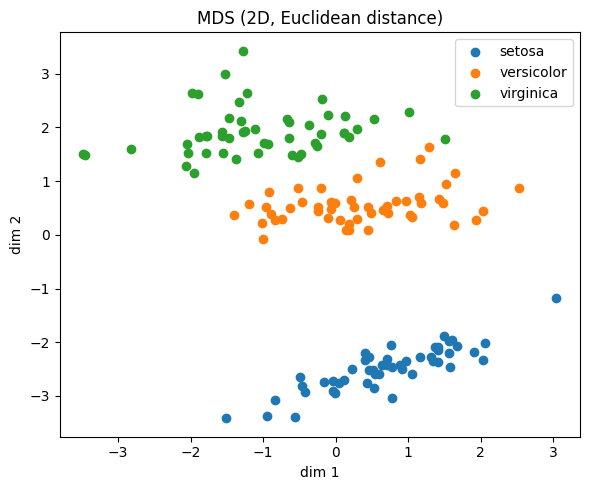

In [36]:
mds = MDS(n_components=2, dissimilarity='euclidean', random_state=0)
X_mds = mds.fit_transform(X_scaled)

plot_embedding(X_mds, "MDS (2D, Euclidean distance)")


#### **2a Analysis**
1. MDS  preserves the pairwise Euclidean distances between points when transforming from 4D to 2D.
2. Sentosa class is well seprated but versicolor and virginica has small marging in sepration.

#### **2(b) Isomap with k = 6, 12, 20**

C:\Users\upratham\anaconda3\envs\tf\lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\upratham\anaconda3\envs\tf\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


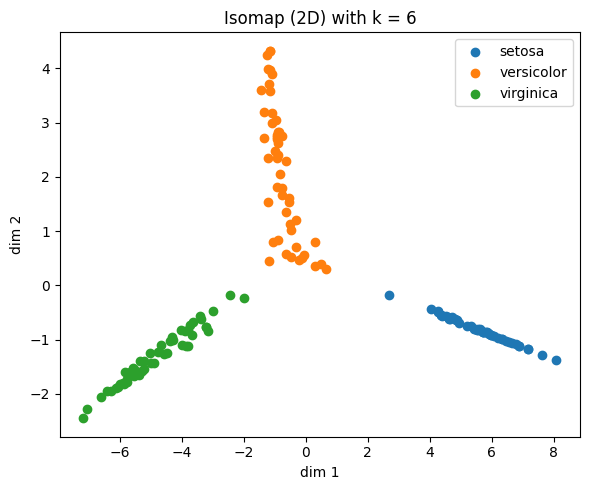

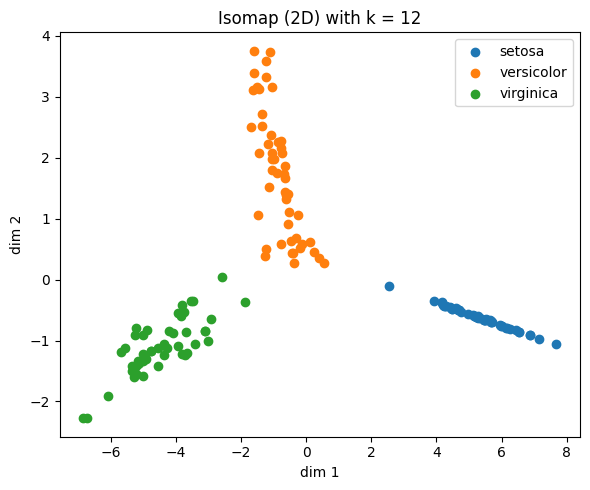

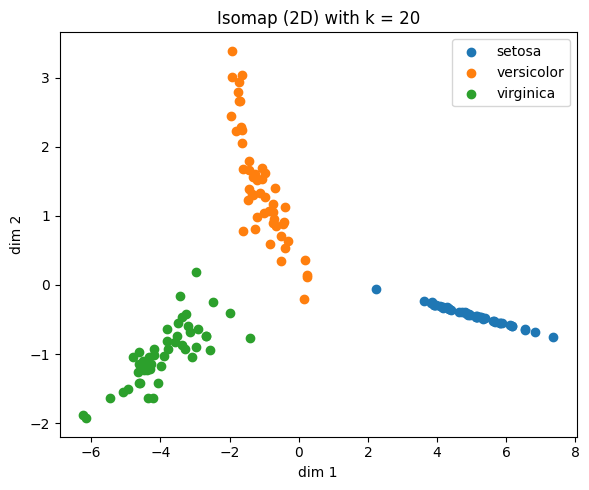

In [37]:
ks_isomap = [6, 12, 20]
embd_isomap = {}

for k in ks_isomap:
    iso = Isomap(n_neighbors=k, n_components=2)
    Z = iso.fit_transform(X_scaled)
    embd_isomap[k] = Z
    plot_embedding(Z, f"Isomap (2D) with k = {k}")


#### **2b Analysis**
1. In Isomap, the parameter k controls neighborhood size.
2. k = 6 : The neighborhood graph is very local. If k is too small, the graph may be close to disconnected.
3. k = 12 : The graph is better connected while still reasonably local. The embedding is smoother and more constant.
4. k = 20 : Graph becomes more global, Isomap behaves closer to a global dimentionality reduction; local manifold details are smoothed and also boundaries are wellseprated with high margin.

#### **2(c) LLE with k = 6, 10, 20, 25**

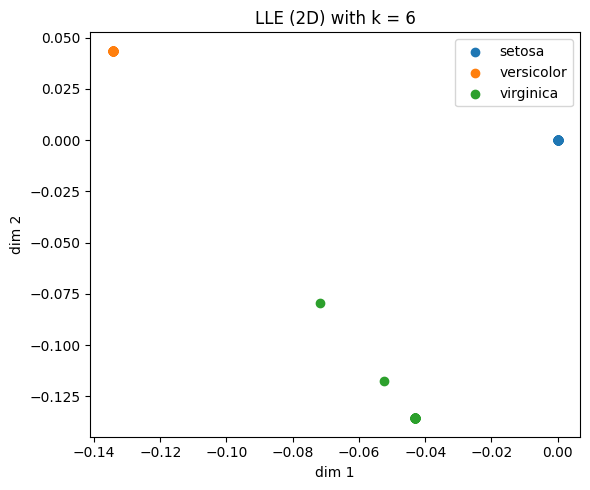

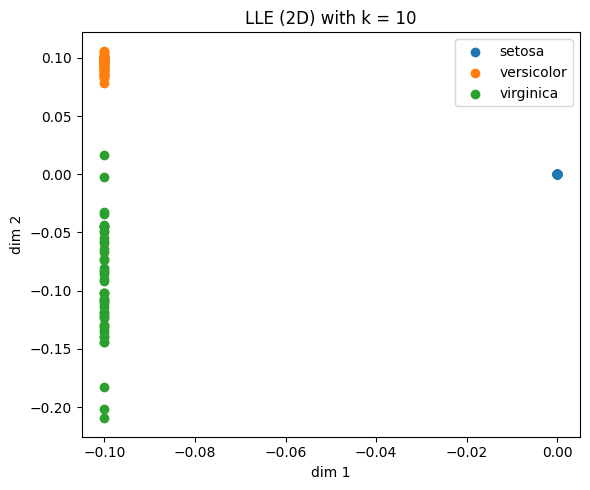

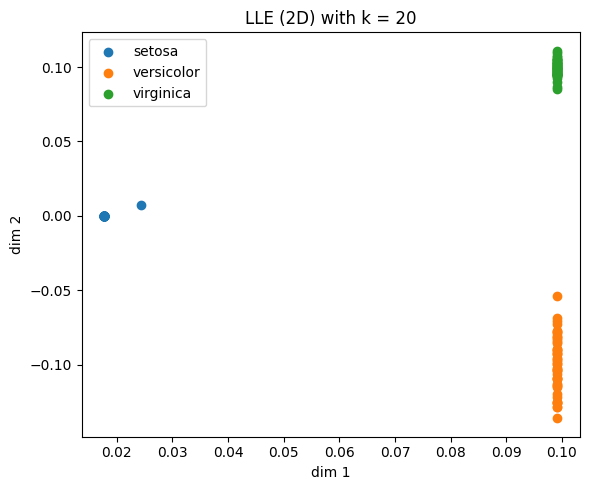

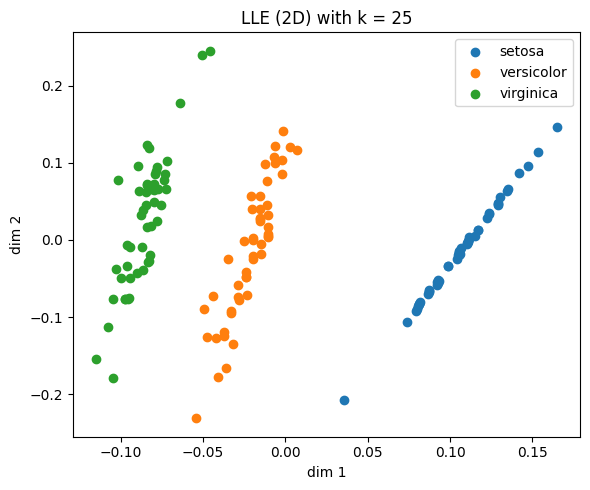

In [38]:
ks_lle = [6, 10, 20, 25]
emb_lle = {}

for k in ks_lle:
    lle = LocallyLinearEmbedding(n_neighbors=k, n_components=2, method='standard', random_state=0)
    Z = lle.fit_transform(X_scaled)
    emb_lle[k] = Z
    plot_embedding(Z, f"LLE (2D) with k = {k}")


#### **2C Analysis**

1. For k = 6, Some points of the same class are not together. The result is not that good  because each point uses very few neighbors.
2. For k = 10,gives smooth graph . Data points from the same label are grouped. but still scope for improvement.virginica and versicolor are clusterd on same direction.
3. For k = 20, similar to k=10 not much different suggesting that , significant change in k will provide significant change in clustering.
4. For k = 25, Data pointed are closely clutsred. Classes are well seprated in both dimentions 

